In [1]:
import sys
sys.path.append('../..')
from TO.utils import check_package_status
check_package_status()

from experiments.utils import set_plt_template
set_plt_template()

<div class="alert alert-block alert-success" style="font-size: 14px; border-radius: 10px"><h4>[GO] TO @ 1b7961aa61a94db9b52e844cd5039944d3c885c3
</h4><pre>  ✅ No changes found in the ./TO packge.</pre></div>

# 0331 No. runs per Experiment

**goal**

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import pickle
with open('../0331_discrete_vs_continuous/convergence-curves.pkl', 'rb') as handle : experiments = pickle.load(handle)

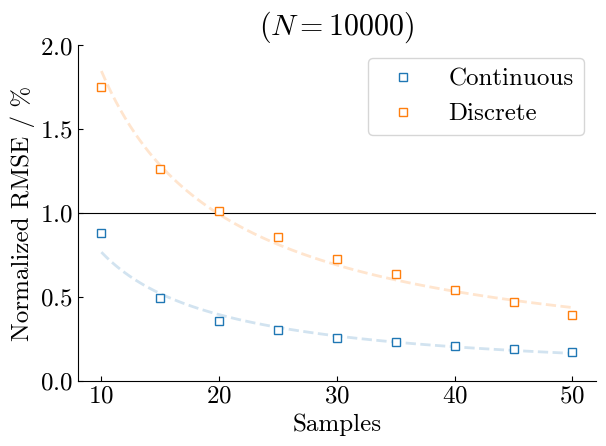

In [4]:
fig, ax = plt.subplots()

for (exp_i, exp) in enumerate(experiments):
    X = experiments[exp]
    X = X[~np.isnan(X).any(axis=1)]
    Q2 = np.median(X, axis=0)
    (Q1, Q3) = np.percentile(X, [25, 75], axis=0)

    IQR = Q3[-1] - Q1[-1]

    n_sub = np.arange(10, 55, 5)

    N = 10_000
    err_rmse = np.empty(len(n_sub))
    for (i, sub) in enumerate(n_sub) :
        err = np.empty(N)
        for j in range(N):
            np.random.seed(j)
            idx = np.random.permutation(len(X))[:sub]
            err[j] = Q2[-1] - np.median(X[idx,-1])
        err_rmse[i] = np.sqrt(np.mean(np.square(err))) / Q2[-1]

    a, b = np.polyfit(np.log(n_sub), np.log(err_rmse*100), 1)
    n_sub_interpolated = np.linspace(n_sub.min(), n_sub.max(), 100)
    ax.plot(n_sub_interpolated, np.exp(a*np.log(n_sub_interpolated) + b), ls='--', alpha=.2, lw=2)
    ax.plot(n_sub, err_rmse*100, label=exp.capitalize(), lw=0, mfc='w', marker='s', c=f'C{exp_i}')

ax.axhline(1, c='k', lw=.8, zorder=-1)
ax.set_xlabel('Samples'); ax.set_ylabel('Normalized RMSE / %'); ax.legend(); ax.set_ylim(0, 2); ax.set_title(f'$(N={N})$')
fig.tight_layout()